# Import Libraries

In [ ]:
#import useful Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,normalize
from sklearn.metrics import confusion_matrix,classification_report,recall_score,f1_score,precision_score,precision_recall_curve,roc_curve
from keras.models import Sequential,Model
from keras.layers import Dense,BatchNormalization,Activation,Input,LeakyReLU
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
# warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IoTID20.csv')
labels = df.iloc[:,-3]
df = df.select_dtypes(exclude=['object'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  int64  
 1   Dst_Port           625783 non-null  int64  
 2   Protocol           625783 non-null  int64  
 3   Flow_Duration      625783 non-null  int64  
 4   Tot_Fwd_Pkts       625783 non-null  int64  
 5   Tot_Bwd_Pkts       625783 non-null  int64  
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

In [ ]:
le = LabelEncoder()
en_labels = le.fit_transform(labels)
le.classes_

array(['Anomaly', 'Normal'], dtype=object)

In [ ]:
#Concatinating the labels with the dataset
df['Labels'] = en_labels
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Labels
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0


In [ ]:
print("Does dataframe have inf values: {}".format(np.any(np.isinf(df))))
print("Does dataframe have nan values: {}".format(np.any(np.isnan(df))))
print("Dataframe shape before dropping na/inf: {}".format(df.shape))
df.replace(to_replace=[np.inf,-np.inf],value=np.nan,inplace=True)
df.dropna(inplace=True)
print("Dataframe shape after dropping na/inf: {}".format(df.shape))
print("Does dataframe still have inf values: {}".format(np.any(np.isinf(df))))
print("Does dataframe still have nan values: {}".format(np.any(np.isnan(df))))

Does dataframe have inf values: True
Does dataframe have nan values: False
Dataframe shape before dropping na/inf: (625783, 80)
Dataframe shape after dropping na/inf: (625415, 80)
Does dataframe still have inf values: False
Does dataframe still have nan values: False


In [ ]:
X = df.iloc[:,:-1]
X.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0


In [ ]:
Y = df.iloc[:,-1]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Labels, dtype: int64

In [ ]:
X = normalize(X,axis=1)
X

array([[3.10944406e-04, 3.14084945e-04, 5.28605490e-07, ...,
        0.00000000e+00, 2.33208305e-06, 2.33208305e-06],
       [1.06016438e-01, 2.69541564e-02, 2.91922271e-04, ...,
        1.10021976e-01, 2.06972890e-01, 5.13783198e-02],
       [2.64878015e-03, 4.53126424e-04, 3.01414473e-07, ...,
        3.55220363e-08, 3.56673793e-06, 3.51650218e-06],
       ...,
       [7.50152989e-01, 1.28299360e-01, 8.53432552e-05, ...,
        0.00000000e+00, 1.09523844e-03, 1.09523844e-03],
       [5.19882265e-04, 2.86938123e-03, 3.45819688e-07, ...,
        4.07552411e-07, 7.20457684e-06, 6.62821069e-06],
       [4.61538164e-04, 4.66199699e-04, 7.84614878e-07, ...,
        1.50124112e-06, 5.63076560e-06, 3.50769004e-06]])

## Train and Test set split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,random_state=1,test_size=0.3)
# Y_train = Y_train.values.reshape(-1,1)
# Y_test = Y_test.values.reshape(-1,1)

In [ ]:
print("Train set X size: ",X_train.shape)
print("Train set Y size: ",Y_train.shape)
print("Test set X size: ",X_test.shape)
print("Test set Y size: ",Y_test.shape)

Train set X size:  (437790, 79)
Train set Y size:  (437790,)
Test set X size:  (187625, 79)
Test set Y size:  (187625,)


## Neural Network based Binary Classifier using Keras:
---

In [ ]:
model = Sequential()
model.add(Dense(units=60,input_dim=79,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=30,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=15,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(X_train,Y_train,batch_size=100,epochs=15)

Epoch 1/15
4378/4378 [==============================] - 15s 3ms/step - loss: 0.1536 - acc: 0.9520
Epoch 2/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0942 - acc: 0.9710
Epoch 3/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0838 - acc: 0.9746
Epoch 4/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0782 - acc: 0.9766
Epoch 5/15
4378/4378 [==============================] - 13s 3ms/step - loss: 0.0747 - acc: 0.9780
Epoch 6/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0717 - acc: 0.9790
Epoch 7/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0694 - acc: 0.9800
Epoch 8/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0674 - acc: 0.9808
Epoch 9/15
4378/4378 [==============================] - 13s 3ms/step - loss: 0.0652 - acc: 0.9814
Epoch 10/15
4378/4378 [==============================] - 12s 3ms/step - loss: 0.0624 - acc: 0.9827
Epoch 11/15
4378/43

#### Loss and Accuracy

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print("Loss: {}, Accuracy: {}".format(loss,accuracy))

5864/5864 [==============================] - 12s 2ms/step - loss: 0.0469 - acc: 0.9883
Loss: 0.04694807529449463, Accuracy: 0.9883224368095398


#### Predictions

In [ ]:
predictions = model.predict(X_test)
predictions = predictions>0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

#### Loss and Accuracy Graph

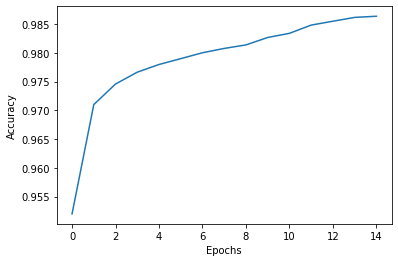

In [ ]:
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

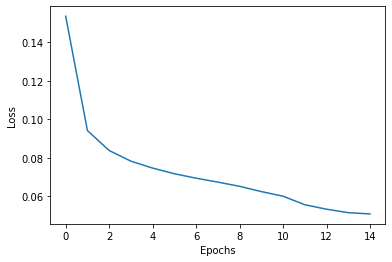

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### F1 Score

In [ ]:
print("F1: %f"% f1_score(Y_test, predictions))

F1: 0.900963


#### Precision Score

In [ ]:
print("Precision: %f "%precision_score(Y_test,predictions))

Precision: 0.986635 


#### Recall Score

In [ ]:
print("Recall: %f "%recall_score(Y_test,predictions))

Recall: 0.828980 


In [ ]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

In [ ]:
prec, rec, tre = precision_recall_curve(Y_test, predictions)

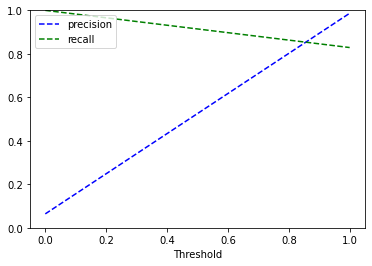

In [ ]:
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(Y_test,predictions)
cm

array([[175468,    135],
       [  2056,   9966]])

#### Heat Map

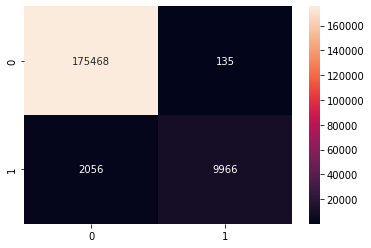

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

#### ROC CURVE

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(Y_test, predictions)

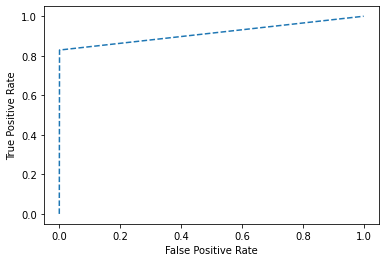

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IoTID20.csv')
labels = df.iloc[:,-1]
df = df.select_dtypes(exclude=['object'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  int64  
 1   Dst_Port           625783 non-null  int64  
 2   Protocol           625783 non-null  int64  
 3   Flow_Duration      625783 non-null  int64  
 4   Tot_Fwd_Pkts       625783 non-null  int64  
 5   Tot_Bwd_Pkts       625783 non-null  int64  
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

In [ ]:
le = LabelEncoder()
en_labels = le.fit_transform(labels)
print(le.classes_)
print("Total Classes: ",len(le.classes_))

['DoS-Synflooding' 'MITM ARP Spoofing' 'Mirai-Ackflooding'
 'Mirai-HTTP Flooding' 'Mirai-Hostbruteforceg' 'Mirai-UDP Flooding'
 'Normal' 'Scan Hostport' 'Scan Port OS']
Total Classes:  9


In [ ]:
#Concatinating the labels with the dataset
df['Labels'] = en_labels
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Labels
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,2
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,8
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,4
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,4


In [ ]:
print("Does dataframe have inf values: {}".format(np.any(np.isinf(df))))
print("Does dataframe have nan values: {}".format(np.any(np.isnan(df))))
print("Dataframe shape before dropping na/inf: {}".format(df.shape))
df.replace(to_replace=[np.inf,-np.inf],value=np.nan,inplace=True)
df.dropna(inplace=True)
print("Dataframe shape after dropping na/inf: {}".format(df.shape))
print("Does dataframe still have inf values: {}".format(np.any(np.isinf(df))))
print("Does dataframe still have nan values: {}".format(np.any(np.isnan(df))))

Does dataframe have inf values: True
Does dataframe have nan values: False
Dataframe shape before dropping na/inf: (625783, 80)
Dataframe shape after dropping na/inf: (625415, 80)
Does dataframe still have inf values: False
Does dataframe still have nan values: False


In [ ]:
size = int(df.shape[0]/2)
df = df.iloc[0:size,:]
df.shape

(312707, 80)

In [ ]:
X = df.iloc[:,:-1]
X.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0


In [ ]:
Y = df.iloc[:,-1]
Y.head()

0    2
1    0
2    8
3    4
4    4
Name: Labels, dtype: int64

In [ ]:
scalar = MinMaxScaler(feature_range=(0,1))
scalar.fit(X)

MinMaxScaler()

In [ ]:
X = scalar.transform(X)
X

array([[1.52788388e-01, 1.54518058e-01, 1.00000000e+00, ...,
        0.00000000e+00, 7.68497741e-04, 7.68497741e-04],
       [3.32925898e-02, 8.47470591e-03, 3.52941176e-01, ...,
        3.39058524e-02, 4.35891918e-02, 1.08204482e-02],
       [8.05607334e-01, 1.37981674e-01, 3.52941176e-01, ...,
        1.06022053e-05, 7.27511194e-04, 7.17264558e-04],
       ...,
       [8.05454545e-01, 1.37981674e-01, 3.52941176e-01, ...,
        0.00000000e+00, 1.48576230e-03, 1.48576230e-03],
       [1.37815126e-01, 7.61560937e-01, 3.52941176e-01, ...,
        2.49015687e-03, 3.78100888e-03, 7.78744377e-04],
       [1.37815126e-01, 7.61560937e-01, 3.52941176e-01, ...,
        2.51204407e-03, 3.79125552e-03, 7.58251104e-04]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,random_state=1,test_size=0.3)

In [ ]:
print("Train set X size: ",X_train.shape)
print("Train set Y size: ",Y_train.shape)
print("Test set X size: ",X_test.shape)
print("Test set Y size: ",Y_test.shape)

Train set X size:  (218894, 79)
Train set Y size:  (218894,)
Test set X size:  (93813, 79)
Test set Y size:  (93813,)


## Training NN using Keras for Multi Classification.

In [ ]:
model = Sequential()
model.add(Dense(units=512,input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=100,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=30,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=15,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(9,activation='softmax',kernel_initializer='glorot_uniform'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
Y_train = to_categorical(Y_train,9)
Y_test = to_categorical(Y_test,9)

In [ ]:
history = model.fit(X_train,Y_train,batch_size=256,epochs=200)

Epoch 1/200
856/856 [==============================] - 3s 3ms/step - loss: 1.0294 - accuracy: 0.5794
Epoch 2/200
856/856 [==============================] - 3s 3ms/step - loss: 0.8251 - accuracy: 0.6343
Epoch 3/200
856/856 [==============================] - 3s 3ms/step - loss: 0.7631 - accuracy: 0.6632
Epoch 4/200
856/856 [==============================] - 3s 3ms/step - loss: 0.7218 - accuracy: 0.6769
Epoch 5/200
856/856 [==============================] - 3s 3ms/step - loss: 0.6997 - accuracy: 0.6833
Epoch 6/200
856/856 [==============================] - 3s 3ms/step - loss: 0.6839 - accuracy: 0.6866
Epoch 7/200
856/856 [==============================] - 3s 3ms/step - loss: 0.6690 - accuracy: 0.6906
Epoch 8/200
856/856 [==============================] - 3s 3ms/step - loss: 0.6567 - accuracy: 0.6918
Epoch 9/200
856/856 [==============================] - 3s 3ms/step - loss: 0.6478 - accuracy: 0.6942
Epoch 10/200
856/856 [==============================] - 3s 3ms/step - loss: 0.6419 - accura

#### Loss and Accuracy

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print("Loss: {}, Accuracy: {}".format(loss,accuracy))

2932/2932 [==============================] - 7s 2ms/step - loss: 0.5613 - accuracy: 0.7246
Loss: 0.5613341331481934, Accuracy: 0.7245690822601318


#### Predictions

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([3, 5, 3, ..., 8, 2, 5])

#### Loss and Accuracy Graph

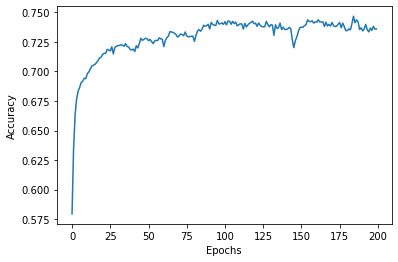

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

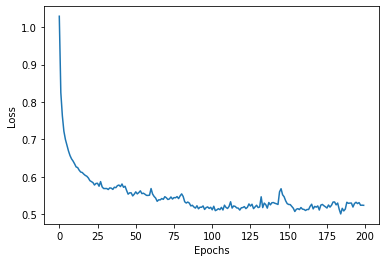

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### F1 Score

In [ ]:
print("F1: %f"% f1_score(np.argmax(Y_test,axis=1), predictions,average="micro"))

F1: 0.724569


#### Precision Score

In [ ]:
print("Precision: %f "%precision_score(np.argmax(Y_test,axis=1),predictions,average="weighted"))

Precision: 0.763154 


#### Recall Score

In [ ]:
print("Recall: %f "%recall_score(np.argmax(Y_test,axis=1), predictions,average="macro"))

Recall: 0.671725 


#### Confusion Matrix

In [ ]:
cmNN = confusion_matrix(np.argmax(Y_test,axis=1),predictions)
print(cmNN)

[[ 8862     4     0     0     2     1     8     0     1]
 [    0  4329    27    36   829     3    11     3    52]
 [    0    30  1357  5714   584   567    12     1     5]
 [    0    36  1339  5790   614   581    14     1     5]
 [    1  1081   172   104 15885   106    14    23   755]
 [    0    34  1302  5748   665 19763    11     1     5]
 [    1    27     5    12    30     4  5928     0    12]
 [    0    69     3     6   694     2     3   199  2367]
 [    0    97     2    12  1963    12     2    14  5861]]


#### Heat Map

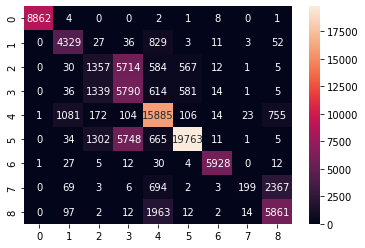

In [ ]:
sns.heatmap(cmNN,annot=True,fmt='g')

#### ROC CURVE

ROC Curve not supported for multi class classification

#### Result

In [ ]:
print("The accuracy of NN for Multi classification is: {}".format((cmNN.trace()/cmNN.sum()*100)))

The accuracy of NN for Multi classification is: 72.45690895718077
